In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score
from io import StringIO
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/mobile_price.csv')
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [ ]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
Target_ratio=df['price_range'].value_counts()/len(df)
print(Target_ratio)

1    0.25
2    0.25
3    0.25
0    0.25
Name: price_range, dtype: float64


In [ ]:
df['price_range'].value_counts(normalize=True)

1    0.25
2    0.25
3    0.25
0    0.25
Name: price_range, dtype: float64

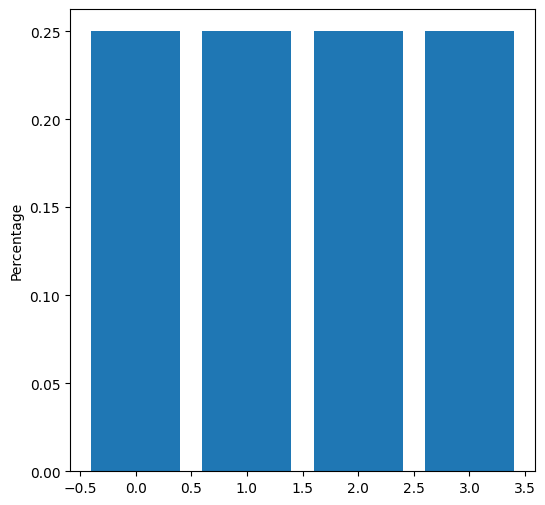

In [ ]:
plt.figure(figsize=(6,6))
plt.bar(Target_ratio.index,Target_ratio)
plt.ylabel('Percentage')
plt.show()

In [ ]:
x=df.drop("price_range",axis=1)
y=df.price_range

In [ ]:
x_train, x_test ,y_train, y_test =train_test_split(x,y,random_state=0,test_size=0.2)

In [ ]:
#model building
#gaussian
gaussian_nb=GaussianNB()
gaussian_nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
#model building
#Bernoulli

bernoulli_nb=BernoulliNB()
bernoulli_nb.fit(x_train,y_train)

BernoulliNB()

In [ ]:
#gaussian_accuracy
pred=gaussian_nb.predict(x_test)
acc_gnb=accuracy_score(y_test,pred)
print("Accuracy score for gaussian:",acc_gnb)

Accuracy score for gaussian: 0.835


In [ ]:
#bernoulli accuracy
pred=bernoulli_nb.predict(x_test)
acc_bnb=accuracy_score(y_test,pred)
print('Accuracy score:',acc_bnb)

Accuracy score: 0.255


<BarContainer object of 2 artists>

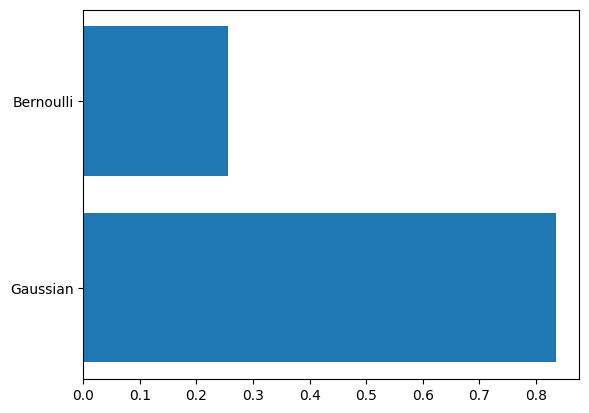

In [ ]:
plt.barh(['Gaussian','Bernoulli'],[acc_gnb,acc_bnb])

In [ ]:
gaussian_nb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [ ]:
gaussian_nb.predict(x_test[:2])

array([3, 0])

In [ ]:
np.round(gaussian_nb.predict_proba(x_test[:2]),2)

array([[0.  , 0.  , 0.17, 0.83],
       [0.93, 0.07, 0.  , 0.  ]])

In [ ]:
gaussian_nb.class_count_

array([405., 408., 401., 386.])

In [ ]:
gaussian_nb.classes_

array([0, 1, 2, 3])

In [ ]:
bernoulli_nb.get_params()

{'alpha': 1.0,
 'binarize': 0.0,
 'class_prior': None,
 'fit_prior': True,
 'force_alpha': 'warn'}

In [ ]:
bernoulli_nb.classes_

array([0, 1, 2, 3])

In [ ]:
bernoulli_nb.score(x_test,y)